<a href="https://colab.research.google.com/github/adityaranjan08/Text-Classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !wget http://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv

In [ ]:
# url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"


In [3]:
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding = "utf-8", sep = "\t")
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["Type"].value_counts()

Type
ham     577
spam     79
Name: count, dtype: int64

In [6]:
round(df["Type"].value_counts(normalize = True)*100,2)

Type
ham     87.96
spam    12.04
Name: proportion, dtype: float64

In [9]:
df["length"] = df["Message"].apply(len)

In [10]:
df.head()

,Type,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualization


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

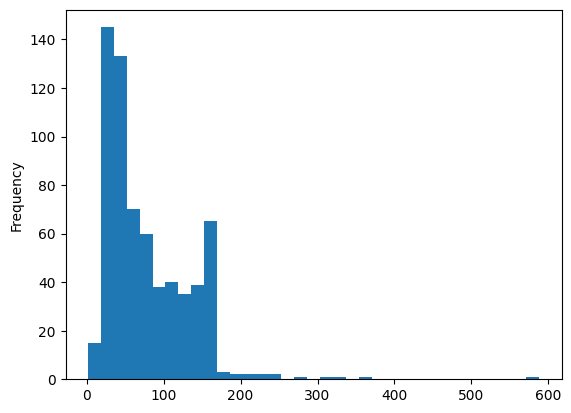

In [12]:
df['length'].plot(kind = 'hist', bins = 35)

In [13]:
df['Type'].unique()

array(['ham', 'spam'], dtype=object)

Text(0.5, 0, 'message length')

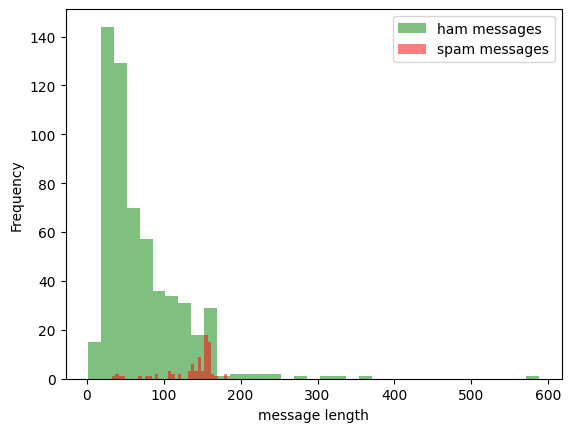

In [21]:
df[df['Type'] == 'ham']['length'].plot(kind = 'hist' , bins = 35 , color = 'green' , label = "ham messages" , alpha = 0.5)
df[df['Type'] == 'spam']['length'].plot(kind = 'hist' , bins = 35 , color = 'red' , label = "spam messages" , alpha = 0.5)

plt.legend()
plt.xlabel("message length")

In [22]:
for messages in df["Message"]:
  print(messages)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

# Problem in message column:
  - not in fix format
  - special characters
  - upper case issue

Create dictionary for all the negative and explicit words , if appears drop that datapoint

In [23]:
import string
mess = "This is a sample message!@.."

In [24]:
mess

'This is a sample message!@..'

In [26]:
nonpunc = ''.join([char for char in mess if char not in string.punctuation])

In [27]:
nonpunc

'This is a sample message'

In [30]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stopwords.words("english")[:10]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words("english")]  # Split and filter stopwords

In [34]:
def text_process(mess):
  nonpunc = ''.join([char for char in mess if char not in string.punctuation])
  clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words("english")]
  return clean_mess

In [36]:
df["word_processed"] = df["Message"].head().apply(text_process)

In [37]:
df.head()

,Type,Message,length,word_processed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."
